# Extracting the data

In this notebook we use the Kaggle API to download the dataset containing jpg images.I chose to store the data in Google Drive and to use Google Colab as my chosen coding environment for this particular exercise due to the large size of the dataset.

## Accessing the data on Kaggle

To access the dataset you need to navigate to: https://www.kaggle.com/competitions/planet-understanding-the-amazon-from-space/data

## Manual download of 7z files

I found that the easiest way to do it was to download the following files:
- train-jpg.tar.7z
- test-jpg.tar.7z

## Uploading to Google Drive and extracting contents

I then uploaded these files to a folder in my Google Drive. In this google colab notebook we will access these two 7z files and decompress them into tar files. We will then further decompress these tar files to arrive at two folders (one for train and one for test) containing the jpg images which will be used to train and test the model.


In [19]:
import os

# Create a directory for Kaggle API
os.makedirs('/root/.kaggle', exist_ok=True)

Mount your Google Drive here so that you can access your Google Drive files from the Colab environment

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this step we move our kaggle.json file with our credentials to the correct .kaggle folder. I chose to put kaggle.json file in my Drive but you can also choose to manually upload it each time you run the notebook.

In [21]:
# Copy the kaggle.json file to the appropriate directory
!cp /content/drive/MyDrive/2024/data/kaggle.json /root/.kaggle/


In [22]:
# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

Now we download part of the dataset containing e.g. mappings and descriptions of the dataset


In [23]:
# Download a Kaggle competition dataset
!kaggle competitions download -c planet-understanding-the-amazon-from-space

planet-understanding-the-amazon-from-space.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Unzip the Kaggle dataset
!unzip -q planet-understanding-the-amazon-from-space.zip -d /content/planet_dataset/

In this step we extract the 7z files to tar files

In [ ]:
!7z x /content/drive/MyDrive/2024/data/amazon_data/train-jpg.tar.7z -o/content/drive/MyDrive/2024/data/amazon_data/tar_files/

In [ ]:
!7z x /content/drive/MyDrive/2024/data/amazon_data/test-jpg.tar.7z -o/content/drive/MyDrive/2024/data/amazon_data/tar_files/

In this step we extract the tar files to folders containing the jpg files

In [ ]:
!tar -xvf /content/drive/MyDrive/2024/data/amazon_data/tar_files/train-jpg.tar -C /content/drive/MyDrive/2024/data/amazon_data/

In [ ]:
!tar -xvf /content/drive/MyDrive/2024/data/amazon_data/tar_files/test-jpg.tar -C /content/drive/MyDrive/2024/data/amazon_data/

Now we can import matplotlib and PIL to display some example data

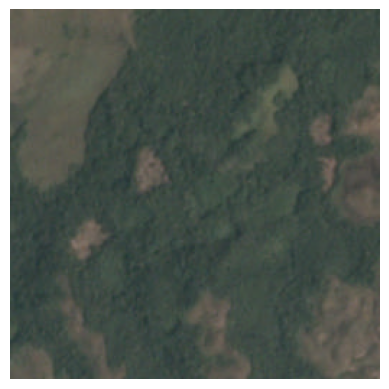

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the image folder
train_folder = '/content/drive/MyDrive/2024/data/amazon_data/train-jpg'
test_folder = '/content/drive/MyDrive/2024/data/amazon_data/test-jpg'

# List all files in the train folder (assuming they are .jpg)
train_images = os.listdir(train_folder)

img_idx = 55

# Pick the first image file (you can choose any index)
img_path = os.path.join(train_folder, train_images[img_idx])

# Open the image using PIL
img = Image.open(img_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()